# DAT301 Project 2

# Understanding Factors Contributing to Spotify Streams

Problem Statement: Using this dataset, I am trying to see if it is possible to predict the total number of streams based on features such as the number of Spotify playlists the songs are included in and its presence and rank on Spotify charts for The Weeknd, using Machine Learning Algorithms, such as Random Forest (RF) and Ridge Regression    

The reason why I am curious to see if either RF or ridge regression are good methods to use is because they are the most popular machine learning algorithms known for its accuracy in predictive modeling tasks. An advantage of using RF for smaller datasets is its ability to use ensemble learning, where multiple decision trees are trained on different subsets of data and then combined to make predictions. Ridge Regression is good for dealing with smaller datasets and provides a more stable and generizable model. 

##  Loading the Libraries/Modules

I started off by loading the libraries and modules needed. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

## What is Each Used for?

-Pandas: Pandas is a data manipulation and analysis library in Python that provides data structures like DataFrame and Series, along with functions for reading, writing, and processing tabular data. 

-Numpy: NumPy is a numerical computing library in Python that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

-sklearn.model_selection: This is a module in scikit-learn provides tools for model selection and evaluation, including functions for splitting data into training and testing sets, cross-validation techniques, and parameter tuning.

-sklearn.ensemble: This module in scikit-learn is focused on ensemble methods, which combine multiple machine learning models to improve prediction accuracy and robustness. 

-sklearn.metrics: This module in scikit-learn provides a range of functions for evaluating the performance of machine learning models.

-sklearn.linear_model: This module in scikit-learn provides tools for linear regression, logistic regression, and other linear models. 

-matplotlib.pyplot: Matplotlib is a plotting library in Python that provides functions for creating various types of plots and visualizations, allowing users to represent data in graphical formats for analysis and presentation.

## Loading and Visualizing the Dataset

I need to start off by loading my dataset. In addition, I would like to visualize it as well, so that I can get an idea of what the rows and columns look like.

In [2]:
# Importing the dataset with specified encoding
spotify_dataset = pd.read_csv("~/datasets/spotify-2023.csv", encoding='latin1')

# Visualizing the dataset structure
print(spotify_dataset)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.


This is quite difficult to read, but since I am only focusing on one artist, I will need to pre-process the data for modeling by filtering it to only include statistics for The Weeknd.

## Pre-Processing the Dataset

In [3]:
# Filtering the dataset for The Weeknd
the_weeknd_spotify = spotify_dataset[spotify_dataset['artist(s)_name'] == "The Weeknd"]

# Displaying information about the filtered dataset
print(the_weeknd_spotify.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 47 to 616
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            22 non-null     object
 1   artist(s)_name        22 non-null     object
 2   artist_count          22 non-null     int64 
 3   released_year         22 non-null     int64 
 4   released_month        22 non-null     int64 
 5   released_day          22 non-null     int64 
 6   in_spotify_playlists  22 non-null     int64 
 7   in_spotify_charts     22 non-null     int64 
 8   streams               22 non-null     object
 9   in_apple_playlists    22 non-null     int64 
 10  in_apple_charts       22 non-null     int64 
 11  in_deezer_playlists   22 non-null     object
 12  in_deezer_charts      22 non-null     int64 
 13  in_shazam_charts      19 non-null     object
 14  bpm                   22 non-null     int64 
 15  key                   17 non-null     object


Since there are many columns in this new dataset that are not really necessary for our purposes, I will further filter this down to include only the essential columns. 

In [4]:
# Selecting relevant columns and creating a new DataFrame
the_weeknd_data = the_weeknd_spotify.drop(columns=[
    'released_year', 'released_month', 'released_day', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%'
])

# Displaying information about the new DataFrame
print(the_weeknd_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 47 to 616
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            22 non-null     object
 1   artist(s)_name        22 non-null     object
 2   artist_count          22 non-null     int64 
 3   in_spotify_playlists  22 non-null     int64 
 4   in_spotify_charts     22 non-null     int64 
 5   streams               22 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.2+ KB
None


## Data wrangling, Munging, and Cleaning

While I do not think filtering out NA values is necessary in this case, it is always good practice to do so, just in case there are NA values that I cannot see.

In [5]:
# Filtering rows based on non-NA values
the_weeknd_data = the_weeknd_data[
    (~the_weeknd_data['track_name'].isna()) & 
    (~the_weeknd_data['artist(s)_name'].isna()) & 
    (~the_weeknd_data['artist_count'].isna()) & 
    (~the_weeknd_data['in_spotify_playlists'].isna()) & 
    (~the_weeknd_data['in_spotify_charts'].isna()) & 
    (~the_weeknd_data['streams'].isna())
]

# Displaying information about the filtered DataFrame
print(the_weeknd_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 47 to 616
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            22 non-null     object
 1   artist(s)_name        22 non-null     object
 2   artist_count          22 non-null     int64 
 3   in_spotify_playlists  22 non-null     int64 
 4   in_spotify_charts     22 non-null     int64 
 5   streams               22 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.2+ KB
None


Before I perform exploratory data analysis, I would like to make sure that my columns are numeric if they aren't already. 

In [6]:
# Convert columns to numeric in Python using pandas
the_weeknd_data['in_spotify_playlists'] = pd.to_numeric(the_weeknd_data['in_spotify_playlists'])
the_weeknd_data['in_spotify_charts'] = pd.to_numeric(the_weeknd_data['in_spotify_charts'])
the_weeknd_data['streams'] = pd.to_numeric(the_weeknd_data['streams'])

# Print the information about the DataFrame after conversion
print(the_weeknd_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 47 to 616
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            22 non-null     object
 1   artist(s)_name        22 non-null     object
 2   artist_count          22 non-null     int64 
 3   in_spotify_playlists  22 non-null     int64 
 4   in_spotify_charts     22 non-null     int64 
 5   streams               22 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ KB
None


## Exploratory Data Analysis

 Now that the data is completely processed, I would like to perform some exploratory data analysis and collect further insights. I will be using the "summary" function to understand the distribution of the data, and I will be using the "cor" function to get the correlation coefficient.

In [7]:
# Calculate summary statistics
summary_statistics = the_weeknd_data.describe()
print(summary_statistics)

# Calculate correlation coefficients
cor_coeff = the_weeknd_data[['in_spotify_playlists', 'in_spotify_charts', 'streams']].corr()
print(cor_coeff)

       artist_count  in_spotify_playlists  in_spotify_charts       streams
count          22.0             22.000000          22.000000  2.200000e+01
mean            1.0           6547.863636           8.181818  6.447979e+08
std             0.0          10135.064269          18.709907  9.088140e+08
min             1.0            715.000000           0.000000  3.195957e+07
25%             1.0           1211.000000           0.000000  8.122984e+07
50%             1.0           2698.500000           0.000000  2.637269e+08
75%             1.0           6486.500000           6.000000  6.947336e+08
max             1.0          43899.000000          69.000000  3.703895e+09
                      in_spotify_playlists  in_spotify_charts   streams
in_spotify_playlists              1.000000           0.629798  0.923941
in_spotify_charts                 0.629798           1.000000  0.817985
streams                           0.923941           0.817985  1.000000



The data above shows the minimum, 1st Quartile, Median, Mean 3rd Quartile, and maximum for the 3 metrics. In addition, it also shows the correlation coefficients. The data show that there is a strong, positive correlation (r=0.9239415) between Spotify playlists and streams, indicating that tracks that are frequent in Spotify playlists tend to have higher streaming statistics. There is also a moderate positive correlation between Spotify Playlists and Spotify charts, which indicates that tracks that are frequent in playlists are likely to appear in Spotify Charts.

## Data Visualization 

Now, I will be creating a scatterplot showing the relationship between Spotify Playlists and Number of Streams. 

Correlation Coefficient: 0.9239414635319001


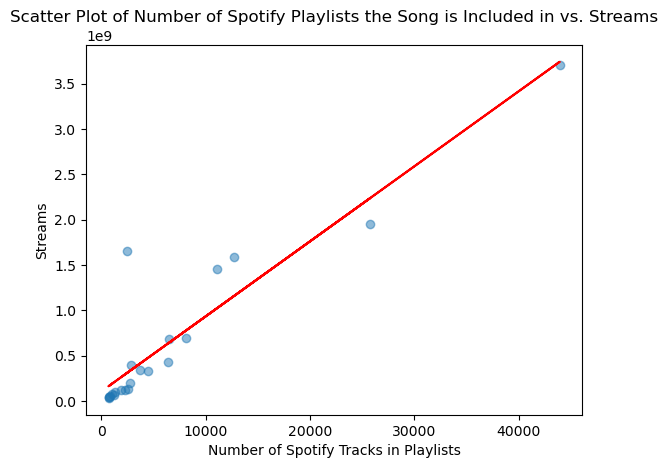

In [8]:
# Scatter plot
plt.scatter(the_weeknd_data['in_spotify_playlists'], the_weeknd_data['streams'], alpha=0.5)
plt.xlabel('Number of Spotify Tracks in Playlists')
plt.ylabel('Streams')
plt.title('Scatter Plot of Number of Spotify Playlists the Song is Included in vs. Streams')

# Add trend line (linear regression)
slope, intercept = np.polyfit(the_weeknd_data['in_spotify_playlists'], the_weeknd_data['streams'], 1)
plt.plot(the_weeknd_data['in_spotify_playlists'], slope * the_weeknd_data['in_spotify_playlists'] + intercept, color='red')

# Calculate and print correlation coefficient
cor_coeffs = np.corrcoef(the_weeknd_data['in_spotify_playlists'], the_weeknd_data['streams'])[0, 1]
print(f"Correlation Coefficient: {cor_coeffs}")

plt.show()

The scatterplot above shows the relationship between the number of spotify playlists The Weeknd's songs are included in and the number of streams. The data show that there is a strong, positive correlation (r=0.9239415) between Spotify playlists and streams,indicating that tracks that are frequent in Spotify playlists tend to have higher streaming statistics. In addition, there are very few outliers. The reason for this could be that out of all of the songs that are in the dataset, there could have been a few that are either extremely popular, or not as popular.

## Machine Learning: Using Random Forest

Now, I will be using Machine Learning Techniques in order to make a predictive model. 

In [9]:
# Selecting relevant columns
data = the_weeknd_data[['in_spotify_playlists', 'in_spotify_charts', 'streams']]

# Split data into training and testing sets (80% training, 20% testing)
np.random.seed(123)
train_data, test_data = train_test_split(data, test_size=0.2)

# Define the regression model (Random Forest)
model = RandomForestRegressor()
model.fit(train_data[['in_spotify_playlists', 'in_spotify_charts']], train_data['streams'])

# Predict streams for test data using the trained model
predictions = model.predict(test_data[['in_spotify_playlists', 'in_spotify_charts']])

# Evaluate the model (calculate RMSE)
rmse = mean_squared_error(test_data['streams'], predictions, squared=False)
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 586886232.2570909


## Machine Learning: Using Ridge Regression 

Now, I will be using Ridge Regression in order to make a predictive model. 

In [10]:
# Selecting relevant columns
data = the_weeknd_data[['in_spotify_playlists', 'in_spotify_charts', 'streams']]

# Split data into training and testing sets (80% training, 20% testing)
np.random.seed(123)
train_data, test_data = train_test_split(data, test_size=0.2)

# Define the regression model (Ridge Regression)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization
ridge_model.fit(train_data[['in_spotify_playlists', 'in_spotify_charts']], train_data['streams'])

# Predict streams for test data using the trained model
predictions = ridge_model.predict(test_data[['in_spotify_playlists', 'in_spotify_charts']])

# Evaluate the model (calculate RMSE)
rmse = mean_squared_error(test_data['streams'], predictions, squared=False)
print(f"Root Mean Square Error (RMSE) for Ridge Regression: {rmse}")


Root Mean Square Error (RMSE) for Ridge Regression: 378314219.7697887


The original question I was trying to answer was if it is possible to predict the total number of streams based on features such as the number of Spotify playlists the songs are included in and its presence and rank on Spotify charts for The Weeknd using Machine Learning Algorithms, such as Random Forest (RF) and Ridge Regression and also see if one technique is better than the other. In conclusion, no, it is not possible to use RF in order to do so. Since the root mean square error for RF and RR are so high (RMSE=187815952 and RMSE= 378314219.76978934), this indicates that the model's predictions are extremely far from the actual values of the number of streams. Essentially, there is a large magnitude of error when estimating the number of streams based on the other parameters.  


There are a few reasons that this could have happened, such as :

1. Poor Model Performance: The current model may not be capturing the patterns in the data, which indicates the need for further model refinement 

2. Underfitting: These particular models may be too simple to capture the underlying relationships in the data, resulting in a high error rate. 

3. Model Selection: While both algorithms are extremely popular and effective , they may not have been the best models to use, especially since this dataset is not very complex. 

For future directions, both models can be iteratively refined in order to make more accurate predictions. In addition, if RF and RR continues to be an inaccurate method to use, other algorithms can be explored in order the improve the overall accuracy of predicting streaming numbers for The Weeknd's songs. 


## Exploring Spotify Data Trends In Wider Scale

In Project 1, we delved into the world of music data using R, specifically focusing on the Most Streamed Spotify Songs dataset for 2023. Our aim was to understand the factors influencing song popularity, visualizing trends in music production and artist representation. We explored the distribution of songs by release year, revealing insights into the evolution of music over time. Additionally, we identified the top artists by song count, providing a glimpse into the most prevalent contributors to the dataset.


## Continuing the Analysis in Project 2
Building upon the insights gained in Project 1, Project 2 takes a Python-based approach to further explore the Spotify dataset to determine if we can predict the popularity of a song based on some other variables such as stream volume, artists vs their streams, different streaming services' charts and seasonality of awards shows with seasonal streams. This time for the overall dataset, we transition to Python, utilizing numpy and pandas for data manipulation and matplotlib, seaborn libraries for visualizations.

We already imported numpy, pandas and matplotlib libraries above so now we will need to import two other libraries which are seaborn for regression plot and datetime to work with date and time of the dataset.

In [11]:
# Import necessary libraries
import seaborn as sns
from datetime import datetime
import warnings

In [12]:
# Dataset Overview
print(spotify_dataset.shape)
spotify_dataset.head()

(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Data Cleaning

We have a little bit overview about the overall dataset so our next step is to look for NA values and fill in if needed, instead of just doing that for the data of The Weeknd which we mentioned before.

In [13]:
spotify_dataset.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [14]:
spotify_dataset['key'].fillna(0,inplace=True)
spotify_dataset['in_shazam_charts'].fillna(0,inplace=True)

We will focus mostly on streams column this time so we also want to make sure they all have numeric values that it would be easier to work with.

In [15]:
# Coerce non-numeric values to NaN
spotify_dataset['streams'] = pd.to_numeric(spotify_dataset['streams'], errors='coerce')

# Drop rows where 'streams' is NaN (i.e., non-numeric rows have been coerced to NaN)
spotify_dataset.dropna(subset=['streams'], inplace=True)

## Data Analysis and Visualizations

First we still want to look at the overview distribution of songs after the year 2000 and focus on the top 20 artists.

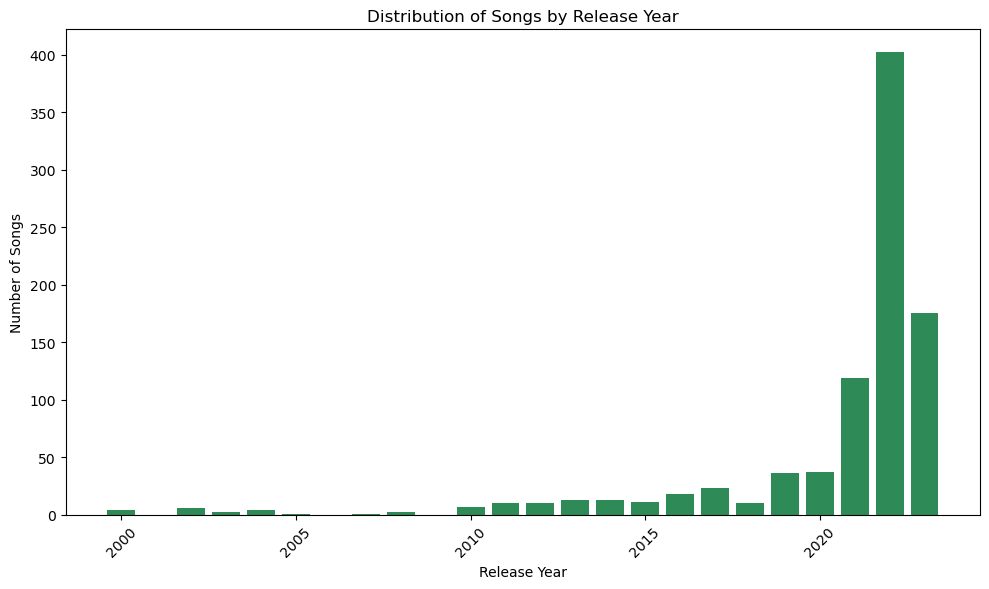

In [16]:
# Songs distribution chart
filtered_df = spotify_dataset[spotify_dataset['released_year'] >= 2000]

plt.figure(figsize=(10, 6))
songs_by_year = filtered_df['released_year'].value_counts().sort_index()

plt.bar(songs_by_year.index, songs_by_year.values, color='seagreen')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

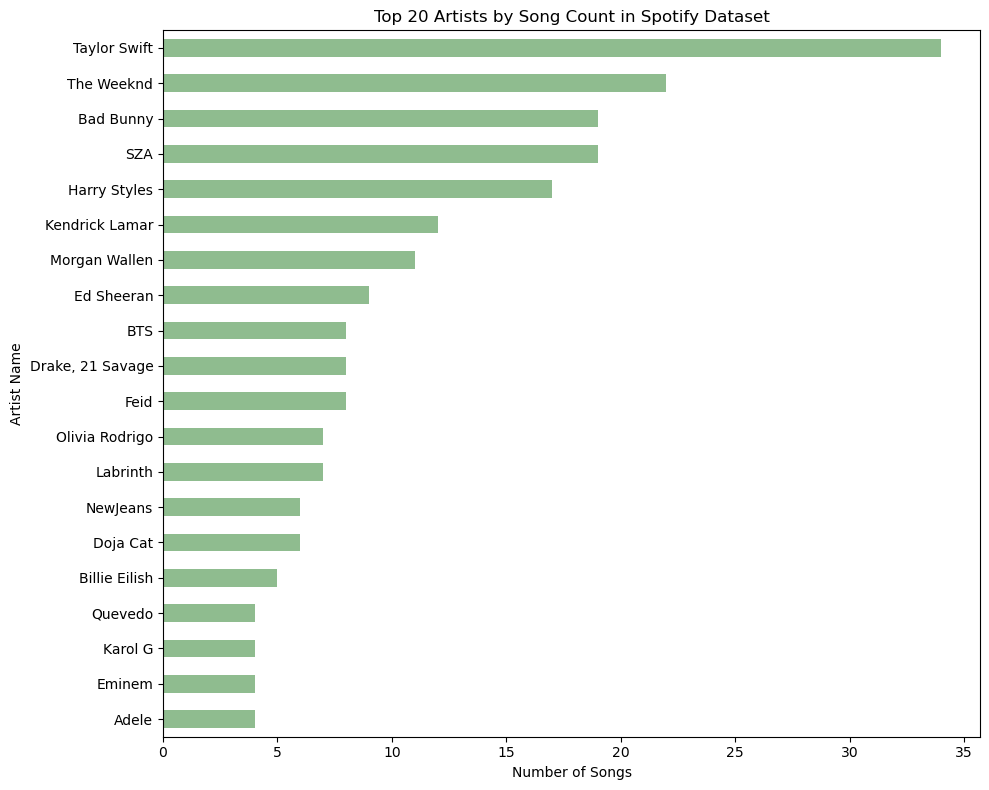

In [17]:
# Top 20 Artists chart
top_artists = filtered_df['artist(s)_name'].value_counts().head(20)

plt.figure(figsize=(10, 8))
top_artists.plot(kind='barh', color='darkseagreen')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.title('Top 20 Artists by Song Count in Spotify Dataset')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()

## Further Analysis

To further analyze and understand the Spotify dataset, after examining the distribution of songs released after the year 2000 and identifying the top artists by song count, we'll delve into more nuanced aspects that could contribute to a song's popularity and its streaming success on Spotify. This analysis will involve exploring correlations between song features and stream counts, as well as highlighting the most-streamed artists and tracks.

To do this, the streams column data type will be converted to integers and normalized to millions for easier interpretation. We will then calculate the total stream counts for the top 20 artists and create a visualization to present these findings. Additionally, a correlation matrix of song features will be generated to uncover potential relationships that affect song popularity. Lastly, we will identify and visualize the top 20 songs by stream count.


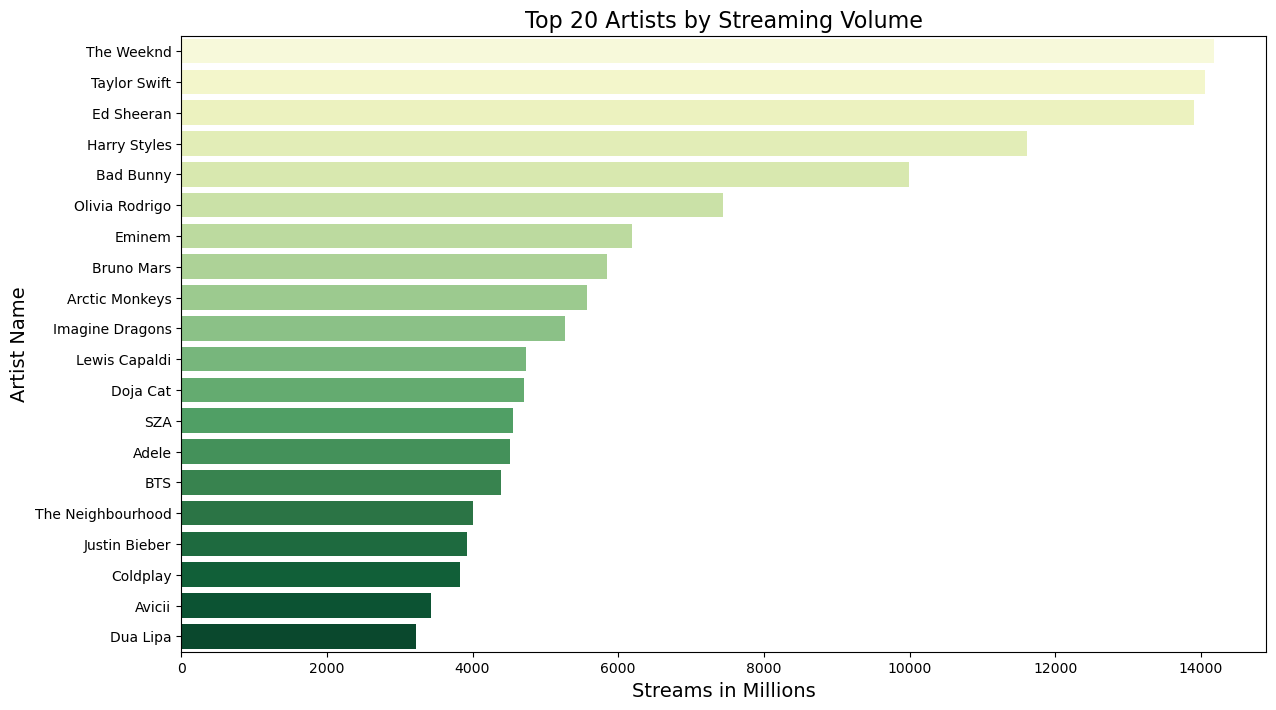

In [18]:
# Changing streams columns data type to integer 
spotify_dataset['streams'] = spotify_dataset['streams'].astype(int)
spotify_dataset['streams_in_millions'] = spotify_dataset['streams'].apply(lambda x: x / 1000000).round(2)

# Calculate the top streams of 15 artists and graph it
top_artists_by_streams = (
    spotify_dataset.groupby('artist(s)_name')['streams_in_millions']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)
 
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_artists_by_streams,
    y='artist(s)_name', 
    x='streams_in_millions',
    palette='YlGn'  
)

plt.title('Top 20 Artists by Streaming Volume', fontsize=16)
plt.xlabel('Streams in Millions', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)
plt.show()

The graph above displays the top 20 artists by song count on Spotify, indicating productivity, while the second graph ranks the top 20 artists by streaming volume, reflecting their popularity and listener engagement. Together, these charts tell us that while an artist like Taylor Swift has a high song count on Spotify, artists like Ed Sheeran, Bad Bunny, and Harry Styles show higher streaming volumes, indicating that they might have a broader or more engaged listener base. It's not just about how many songs an artist releases, but how those songs resonate with the audience, as evidenced by stream counts. An artist might release fewer songs but still garner more streams if their music aligns well with listener preferences or if they have a few highly successful hits.


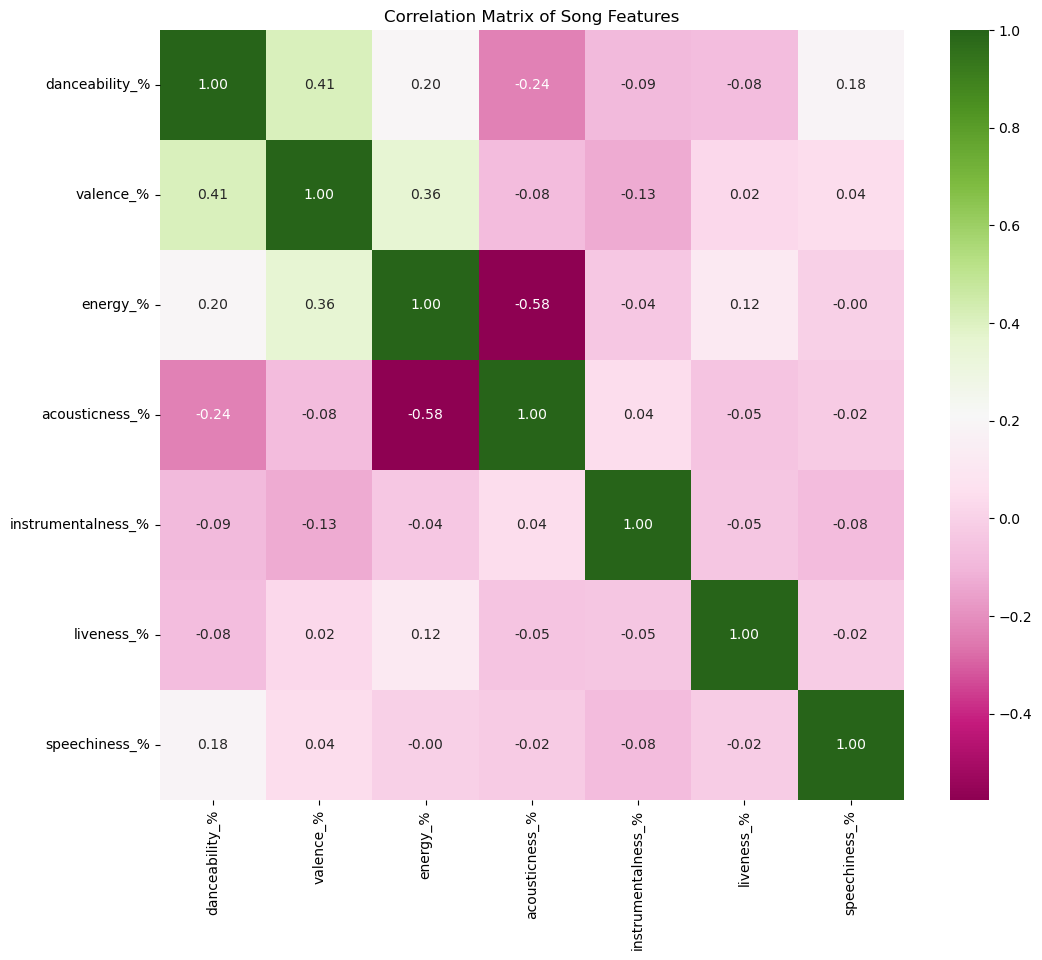

In [19]:
# Correlation Matrix
numeric_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
correlation_matrix = spotify_dataset[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG')
plt.title('Correlation Matrix of Song Features')
plt.show()

Next, we can see through this correlation matrix that high positive correlations, such as between danceability and valence, suggest that songs which are more danceable tend to also be more positive, possibly contributing to their popularity as they may cater to a broader audience looking for uplifting and energetic music. Negative correlations, like between acousticness and energy, indicate that songs are typically either acoustic or energetic, but less commonly both, reflecting divergent styles that cater to different listening preferences.


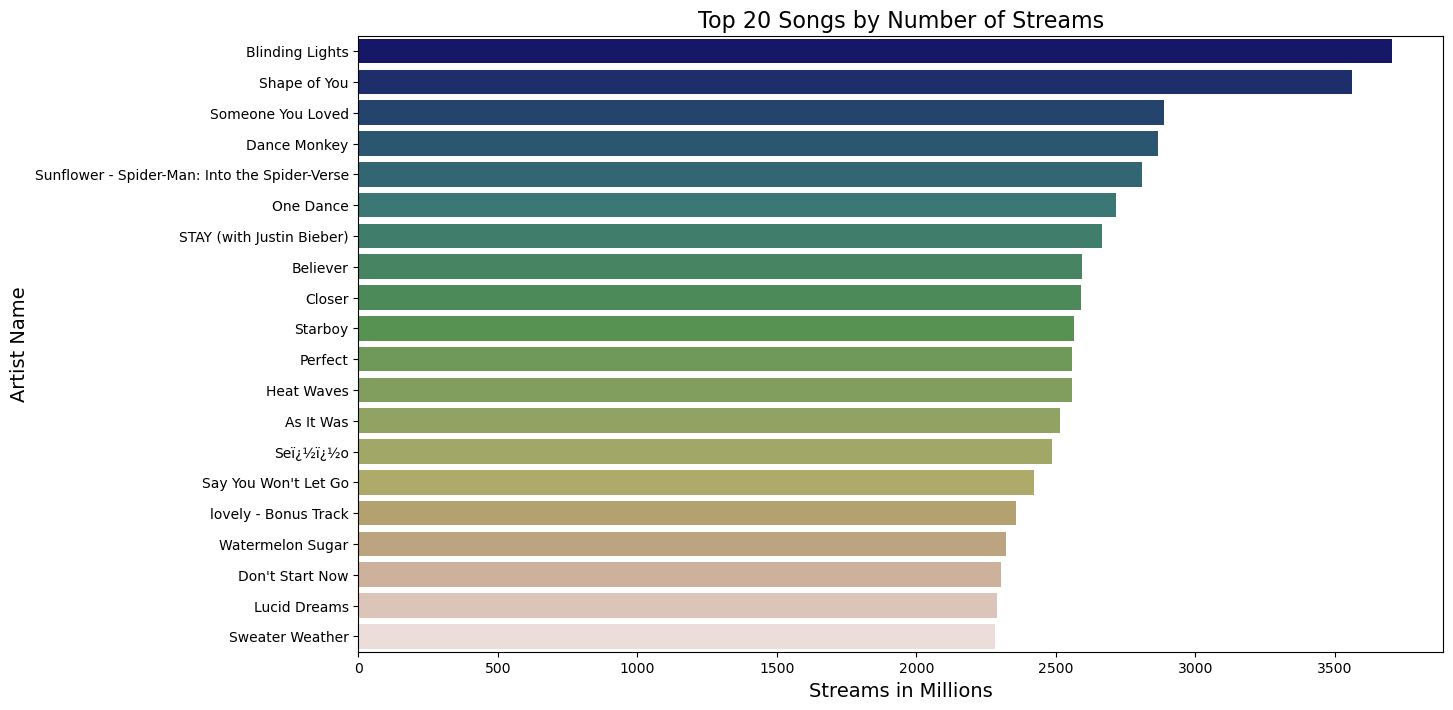

In [20]:
# Calculate the total streams for 15 artists and graph it
top_songs_by_streams = (
    spotify_dataset.groupby('track_name')['streams_in_millions']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)
 
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_songs_by_streams,
    y='track_name', 
    x='streams_in_millions',
    palette='gist_earth'  
)

plt.title('Top 20 Songs by Number of Streams', fontsize=16)
plt.xlabel('Streams in Millions', fontsize=14)
plt.ylabel('Artist Name', fontsize=14)
plt.show()

Lastly, this chart shows the "Top 20 Songs by Number of Streams," highlighting individual tracks that have achieved significant streaming success. Analyzing the song names and genres, one could infer that certain themes, rhythms, or collaborations resonate more with listeners, leading to higher stream counts. Additionally, these songs might commonly feature in user-curated or editorial playlists, be associated with viral social media trends, or benefit from radio play and other forms of promotion.

## Streams by Services

Now we will be comparing the different streaming services charts to one another. We will focus on the charts of Spotify, Apple Music, and Deezer.

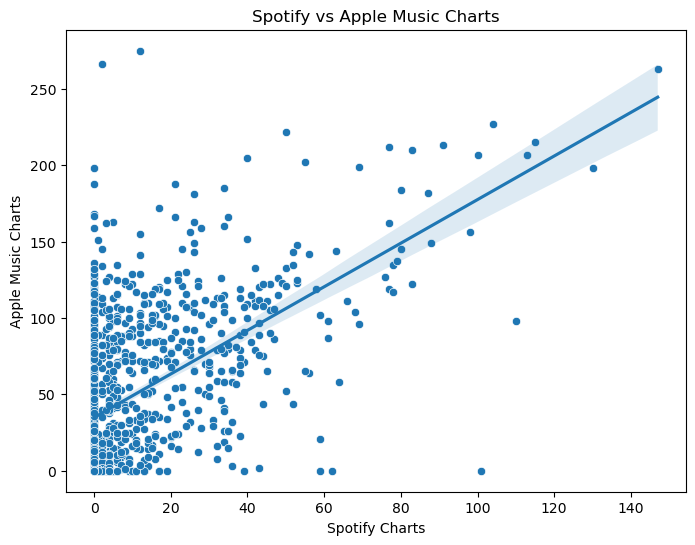

In [21]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_dataset, x='in_spotify_charts', y='in_apple_charts')

# Add regression line
sns.regplot(data=spotify_dataset, x='in_spotify_charts', y='in_apple_charts', scatter=False)

# Set labels and title
plt.xlabel('Spotify Charts')
plt.ylabel('Apple Music Charts')
plt.title('Spotify vs Apple Music Charts')

plt.show()

The first thing I noticed about this graph is the line of black along the left side of the graph. This indicates that there are songs that are on apple music charts but not on spotify, and vice versa. This could have something to do with the song just not being released on both platforms, but it is worth noting because it does affect our regression line. We can see there is a pretty linear relationship between Spotify and Apple music. This was just as we expected since Spotify and Apple music are both very large and popular streaming services.


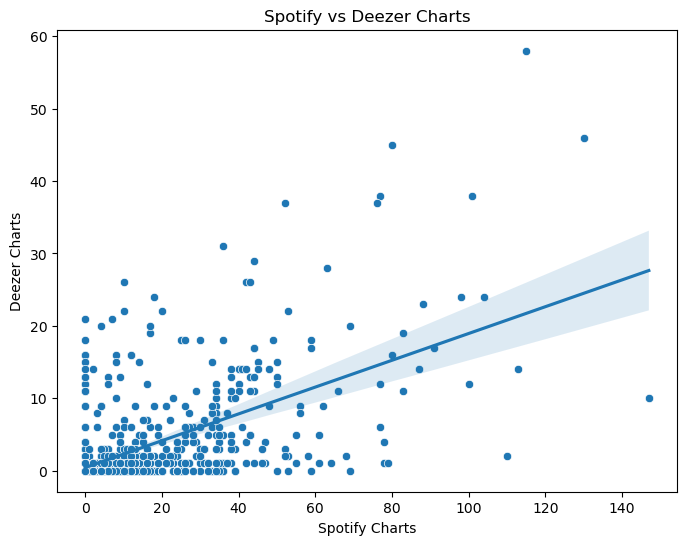

In [22]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_dataset, x='in_spotify_charts', y='in_deezer_charts')

# Add regression line
sns.regplot(data=spotify_dataset, x='in_spotify_charts', y='in_deezer_charts', scatter=False)

# Set labels and title
plt.xlabel('Spotify Charts')
plt.ylabel('Deezer Charts')
plt.title('Spotify vs Deezer Charts')

plt.show()

In this graph we can see a more flat line, with quite a few outliers to the data. At the bottom left corner there is a large chunk of data that scores relatively low on the Deezer charts but not Spotify, which is interesting. This could have to do with the fact that Deezer is a lot less popular of a service compared to Spotify. It is also important to note that there are quite a few outliers that are in a lot of deezer charts and not as many spotify charts. These must be songs that are universally popular and produced by our most popular artists like Taylor Swift and The Weeknd.

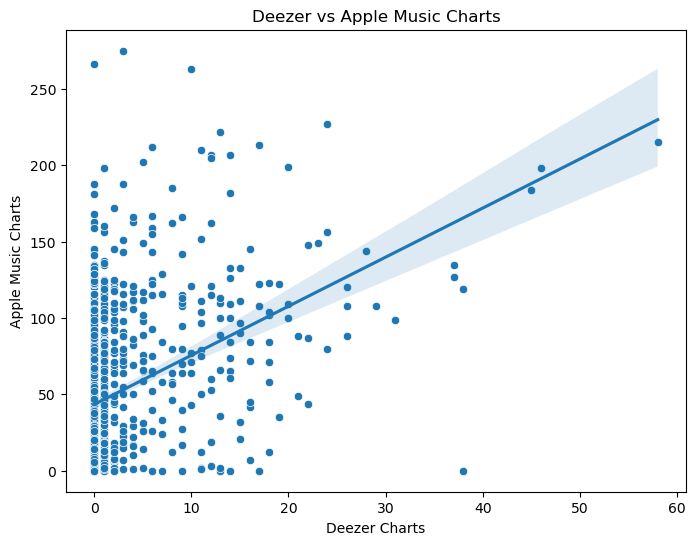

In [23]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_dataset, x='in_deezer_charts', y='in_apple_charts')

# Add regression line
sns.regplot(data=spotify_dataset, x='in_deezer_charts', y='in_apple_charts', scatter=False)

# Set labels and title
plt.xlabel('Deezer Charts')
plt.ylabel('Apple Music Charts')
plt.title('Deezer vs Apple Music Charts')

plt.show()

On this graph the black lines along the side of the graph are very noticeable. This indicates to us that there are a large amount of songs that are in apple music charts, but did not make the Deezer charts at all. This could again be attributed to the fact that a song may be available on Apple music but not Deezer. This chart looks more like how I would expect, pretty even on songs in Apple charts versus songs in Deezer charts. An important thing to note is that the x and y axis have different values, this is because Deezer is much less popular than Apple Music, so there can be smaller values on the x axis. Overall, there is not much correlation between a song's popularity and appearing on many charts. It is safe to say if a song is on many Deezer charts it is a pretty popular song because Deezer is a smaller platform. Apple Music and Spotify are just such big platforms that both popular and unpopular songs can appear on many charts.


## Do Streaming Award Shows Affect Streams?

For next part of the project we will look at if award shows affect streams. First we should pick an artist that won an award and see how their streams varied after winning their award, for this we will pick Taylor Swift. We will focus on her songs released after 2018 so that we can more closely look at the data. First we filter the dataset for Taylor Swift and 2018, then we take a look at all the datapoints we have remaining.

In [24]:
# Filter the dataset for songs by Taylor Swift
Taylor_Swift_Spotify = spotify_dataset[(spotify_dataset['artist(s)_name'] == 'Taylor Swift') & (spotify_dataset['released_year'] > 2018)]

# Display the structure of the filtered dataset
Taylor_Swift_Spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_in_millions
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,800.84
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,F#,Major,69,82,76,6,0,6,3,52.14
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,E,Major,64,51,63,12,0,19,5,999.75
59,cardigan,Taylor Swift,1,2020,7,24,7923,29,812019557,106,...,0,Minor,61,53,58,55,0,27,4,812.02
66,Karma,Taylor Swift,1,2022,10,21,3818,23,404562836,37,...,G#,Major,64,10,62,7,0,48,7,404.56
69,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,7,148,24,39578178,32,...,G#,Major,51,22,53,1,0,15,3,39.58
83,Back To December (Taylor's Version),Taylor Swift,1,2023,7,7,139,17,39228929,16,...,D,Major,50,20,64,1,0,12,3,39.23
113,Mine (Taylor's Version),Taylor Swift,1,2023,7,7,99,15,36912123,21,...,G,Major,65,49,78,0,0,17,4,36.91
119,august,Taylor Swift,1,2020,7,24,7324,22,607123776,25,...,F,Major,51,42,61,53,0,9,3,607.12
191,You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve,Taylor Swift,1,2021,4,9,2619,12,350381515,47,...,F#,Major,63,49,73,5,0,9,3,350.38


Next, we will again do some data cleaning, munging, and wrangling. We will ensure the columns we need are numeric as well as ensuring that the values in those columns are reasonable. As seen above there is no NA values and therefore no need to remove them but we will do so anyways for good practice. Lastly, we will turn the dates into he datetime format and plot the data.


In [25]:
# Ignore the warning message first if there is any
warnings.filterwarnings('ignore')

In [26]:
# Ensure 'streams' column is numeric
Taylor_Swift_Spotify.loc[:, 'streams'] = pd.to_numeric(Taylor_Swift_Spotify['streams'])

# Ensure 'released_month', 'released_year', and 'released_day' columns are numeric
Taylor_Swift_Spotify['released_month'] = pd.to_numeric(Taylor_Swift_Spotify['released_month'], errors='coerce')
Taylor_Swift_Spotify['released_year'] = pd.to_numeric(Taylor_Swift_Spotify['released_year'], errors='coerce')
Taylor_Swift_Spotify['released_day'] = pd.to_numeric(Taylor_Swift_Spotify['released_day'], errors='coerce')


In [27]:
# Ensure that the month values are within reasonable bounds
Taylor_Swift_Spotify['released_month'] = Taylor_Swift_Spotify['released_month'].astype(int)
Taylor_Swift_Spotify['released_month'] = Taylor_Swift_Spotify['released_month'].clip(1, 12)

# Combine 'released_year', 'released_month', and 'released_day' into a single column as string
Taylor_Swift_Spotify['released_date'] = Taylor_Swift_Spotify['released_year'].astype(str) + '-' + Taylor_Swift_Spotify['released_month'].astype(str) + '-' + Taylor_Swift_Spotify['released_day'].astype(str)

# Convert the combined column to datetime format
Taylor_Swift_Spotify['released_date'] = pd.to_datetime(Taylor_Swift_Spotify['released_date'], format='%Y-%m-%d')

warnings.filterwarnings('ignore')

In [28]:
# While we do not expect any NA values, it is good practice to drop all NA values
Taylor_Swift_Spotify = Taylor_Swift_Spotify.dropna(subset=['streams'])


In [29]:
# Aggregate data to monthly level
monthly_streams = Taylor_Swift_Spotify.groupby('released_date')['streams'].sum().reset_index()

Text(0.5, 1.0, 'Seasonal Trends in Total Streams for Taylor Swift post 2018')

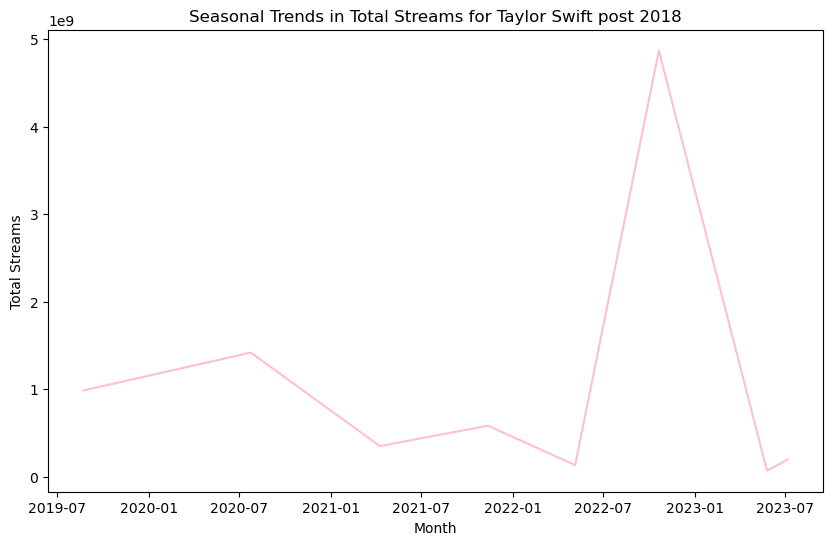

In [30]:
# Plot seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_streams['released_date'], monthly_streams['streams'], color='pink')
plt.xlabel('Month')
plt.ylabel('Total Streams')
plt.title('Seasonal Trends in Total Streams for Taylor Swift post 2018')

Here we can see a plot of the total streams over time. The most obvious point in the graph is October of 2022. This can be explained because Taylor had just released her first album since 2020 so streams were dramatically higher than usual. We can also see a small spike in streams around July of 2020 and this is because she released a few songs during the pandemic. One of the most popular music awards is the Grammy awards. These generally take place in early February every year. This is interesting because we can see a decline in streams around February each year. Taylor Swift won a Grammy for album of the year in 2021 and we can hardly see that reflected in her streams. She has won 14 Grammys and had 52 nominations, so it is possible that this award show does not impact her streams simply because of how often she is nominated.


## Seasonal Trends in Music Streaming

To gain insights into when people stream music the most, we'll aggregate the streaming data to the monthly level and visualize the seasonal trends. By plotting the total streams over time, we can identify patterns in music consumption throughout the year. This analysis helps us understand the seasonality of music streaming behavior, which can be valuable for artists, music producers, and streaming platforms in optimizing release schedules and promotional strategies.

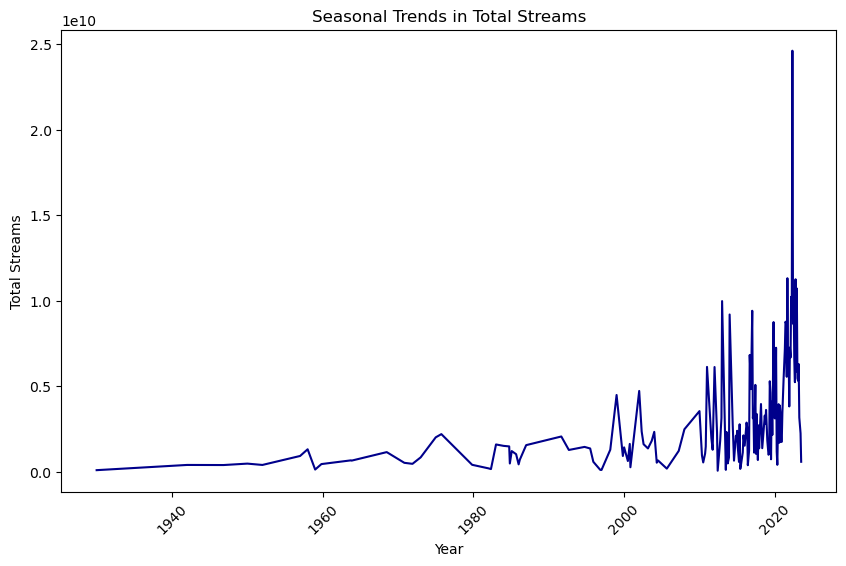

In [31]:
# Convert 'released_month' to date format
spotify_dataset['released_month'] = pd.to_datetime(spotify_dataset['released_year'].astype(str) + '-' + spotify_dataset['released_month'].astype(str) + '-01')

# Aggregate data to monthly level
monthly_streams = spotify_dataset.groupby('released_month')['streams'].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_streams, x='released_month', y='streams', color='darkblue')
plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.title('Seasonal Trends in Total Streams')
plt.xticks(rotation=45)
plt.show()

In the beginning, the number of streams was not very high and remained mostly stable, indicating that either the industry was still in its early stages or the data collection methods were not very extensive. However, starting from 2010, there was a significant increase in both the volume and variability of streams, suggesting a surge in streaming popularity, possibly due to major releases or seasonal trends. The graph shows a sharp spike at the end, which is an outlier and quite different from the previous trends. This is understandable because we have more and more songs since 2010 and more songs mean more options for listeners, which could lead to those peaks in streaming numbers. It looks like the music world has been getting busier by the year, with an explosion of new tunes for everyone to stream. This graph is super helpful in understanding why streaming has become such a big deal and there's just so much more music being put out there.


## Conclusion

Spotify's dataset has revealed the complexity of predicting song popularity. While digital consumption has surged, the sheer volume of content makes it unpredictable which songs will become popular. Machine learning algorithms like Random Forest and Ridge Regression have encountered significant obstacles in predicting hits, evidenced by high RMSE values, indicating that song popularity is influenced by several factors that extend beyond quantifiable metrics.

Moreover, an artist's presence on playlists and charts offers some insight into their reach, but listeners' ever-changing tastes and the impact of social media trends, marketing efforts, and cultural moments also play crucial roles. The cross-platform comparison reveals divergent patterns among Spotify, Apple Music, and Deezer, indicating that regional preferences and platform-specific algorithms also play crucial roles.

In conclusion, predicting future hits remains elusive, requiring a nuanced understanding of the complex interplay between artists, audiences, and the cultural diversity.


## Work Cited

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023